# Random Forest Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/combined_data/combined_data.csv")
df.head()

,AvgTemp,MaxTemp,MinTemp,SeaLevelPressure,AvgHumidity,TotalRainfallSnowmelt,AvgVisibility,AvgWindSpeed,MaxWindSpeed,RainDrizzle,Snow,ThunderStorm,Fog,PM 2.5
0,4.3,10.0,1.7,1023.1,94.0,0.00,8.0,13.0,22.2,0.0,0.0,0.0,0.0,40.080000
1,8.8,14.4,1.7,1021.4,89.0,0.00,10.3,8.9,20.6,0.0,0.0,0.0,0.0,42.400000
2,14.3,17.2,5.0,1016.6,84.0,0.76,12.4,15.2,24.1,0.0,0.0,0.0,0.0,31.250000
3,5.8,9.4,-2.2,1023.8,70.0,0.00,15.6,17.0,38.9,0.0,0.0,0.0,0.0,20.227273
4,2.1,4.0,-1.0,1025.9,49.0,0.00,16.1,20.9,29.4,0.0,0.0,0.0,0.0,17.100000


In [3]:
# split into dependent and independent features
X = df.iloc[:,:-1] # independent features
y = df.iloc[:,-1]  # dependent feature

#### Train test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


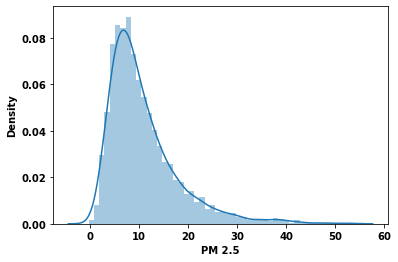

In [5]:
sns.distplot(y)

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [8]:
print(f"Coefficient of determination R^2 for train set: {rf.score(X_train,y_train)}")

Coefficient of determination R^2 for train set: 0.8988438785825889


In [9]:
print(f"Coefficient of determination R^2 for test set: {rf.score(X_test,y_test)}")

Coefficient of determination R^2 for test set: 0.2519532624423333


In [10]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf, X, y, cv=5)

In [11]:
score.mean()

-0.3259262447035642

In [12]:
prediction = rf.predict(X_test)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


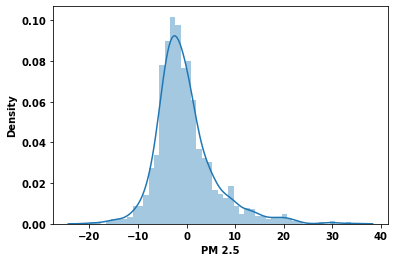

In [13]:
sns.distplot(y_test-prediction)

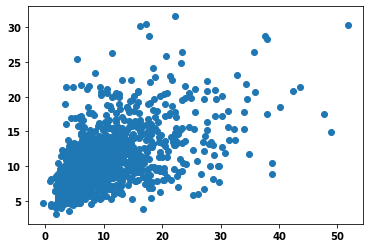

In [14]:
plt.scatter(y_test, prediction)

#### Hyperparameter tuning

In [ ]:
RandomForestRegressor()

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [16]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [17]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [18]:
params = {'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf}

print(params)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [19]:
rf_tuned = RandomForestRegressor()

In [22]:
rf_random = RandomizedSearchCV(estimator=rf_tuned, param_distributions=params, scoring='neg_mean_squared_error', n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [23]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [24]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [25]:
rf_random.best_score_

-37.64390375857785

In [26]:
predictions=rf_random.predict(X_test)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


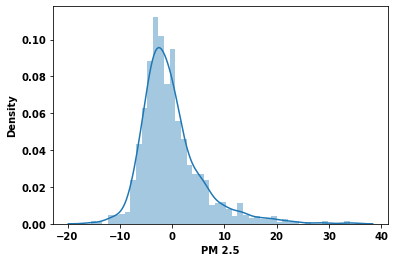

In [27]:
sns.distplot(y_test-predictions)

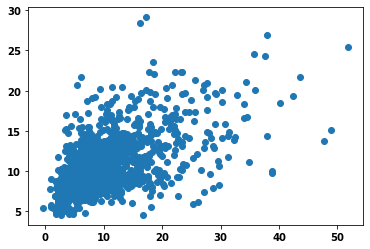

In [28]:
plt.scatter(y_test,predictions)

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.23475296568716
MSE: 34.75667409682571
RMSE: 5.89547912360189


In [31]:
import pickle

In [32]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)